# Global and Local Scopes

### Scopes and Namespaces

When an object is assigned to a variable.
```python
a=10
```
that variable points to some object, and we say that the variable (name) is **bound** to that object.

That object can be accessed using that name in various parts of our code.  
*But not just anywhere!*

That variable name and it's binding (name and object) only "exist" in specific parts of our code.

The portion of code where that name/binding is defined is called the ***lexical scope*** of the variable.

these bindgins are stored in **namespaces** (each scope has its own namespace).

### The Global Scope

The **global** scope is essentially the module scope.  
It spans a **single** file only.

There is no concept of a truly global (across all the modules in our entire app) scope in pytrhon.  
The only exeption to this are some of the **built-in** globally available objects such as:
```python
True     False    None    dict    print
```
The built-in and global variables can be used **anywhere** inside our module.  
 &emsp;&emsp;including inside any *function*

###### Global scopes are nested inside the built-in scope

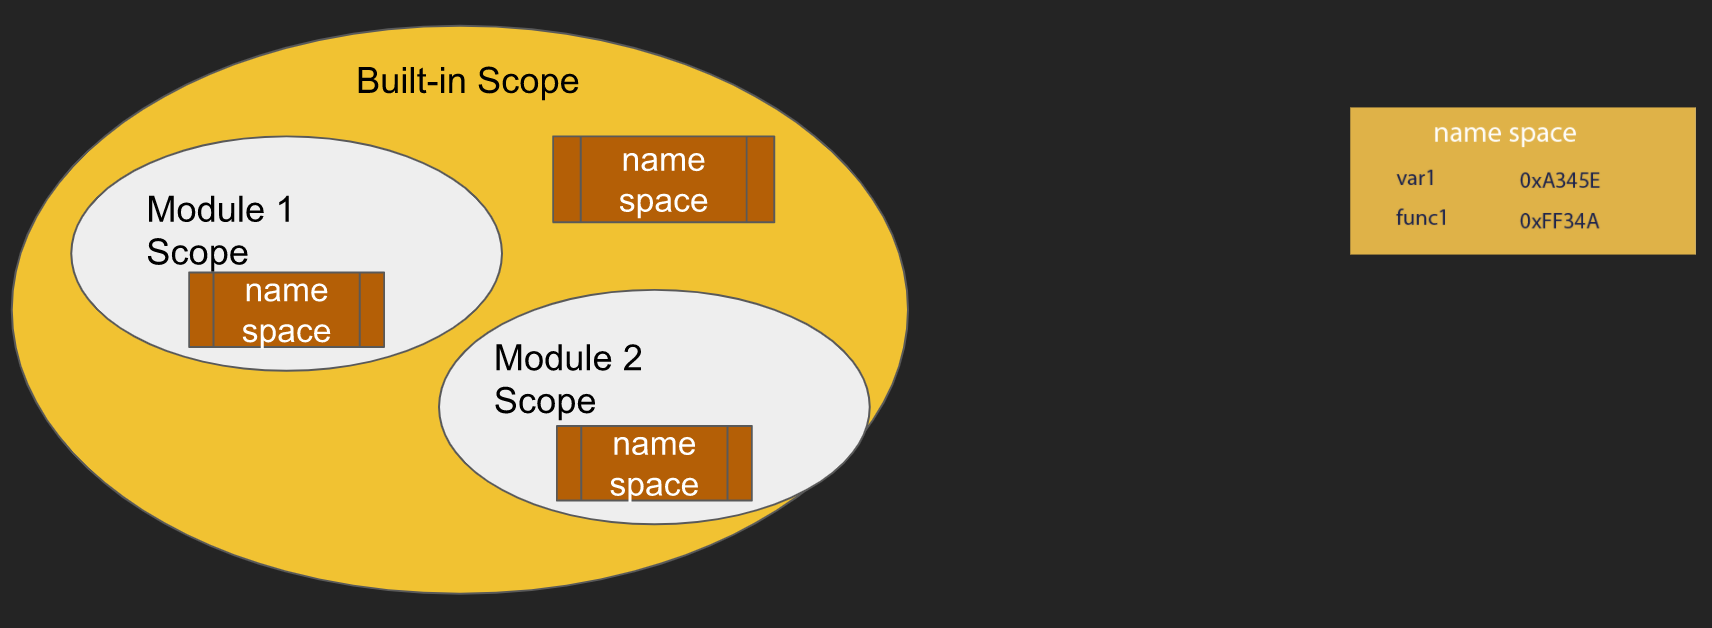

If you reference a variable name inside a scope and Python *does not find it* in that scope's namespace, it will look for it in an **enclosing** scope's namespace.


In [1]:
#Example.
print(True)
#Python couldn't find the True or print in the current (module/global) scope,
#so now it search in it's enclosing, which is built-in scope.
#And built-in scope has print adn True available.

True


### The Local Scope

When we create a function, we can create variable names inside those functions(*using assignment operator*)
```python
a=10
```
Variables defined inside a function are assigned to that scope.

The actual object the variable reference can be *different* each tiem the function is called.  
(this is how and why recursion works)

In [3]:
#Example
def my_func(a,b):
    c=a*b
    return c

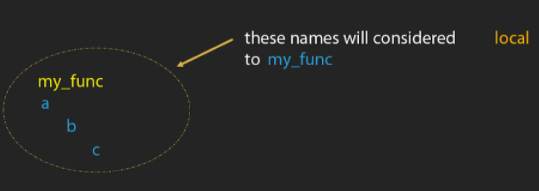

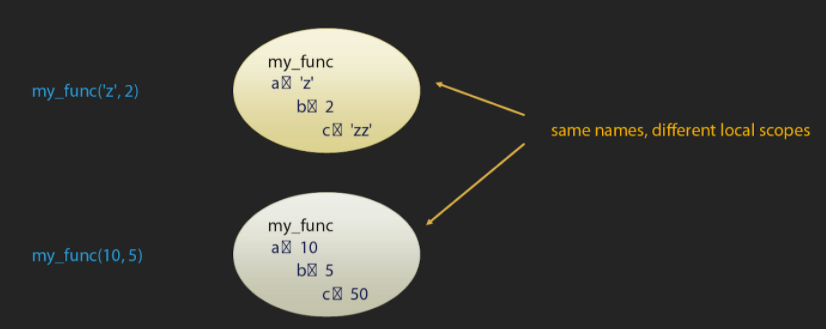

### Nested Scope
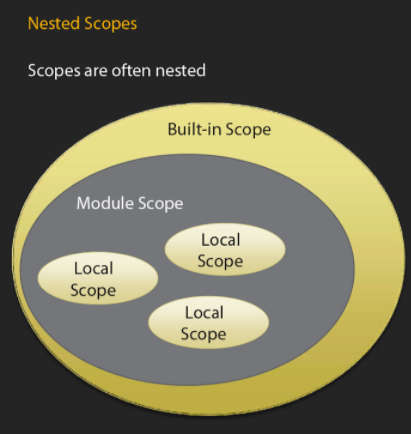

**Namespace Lookups**

When requesting the object bound to a variable name:  
e.g. print(a)

Python will try to find the object bound to the variable(is assignment operator used for variable '**print**')  
 * in current scope first
 * works up the chain of enclosing scopes. 

### Accessing the global scope from local scope:

When **retrieving** the value of a global variable from inside a function, Python automatically searches the local scope's namespace, and up the chain of all enclosing namespaces.
```
   local   ->   global   ->   built-in
```

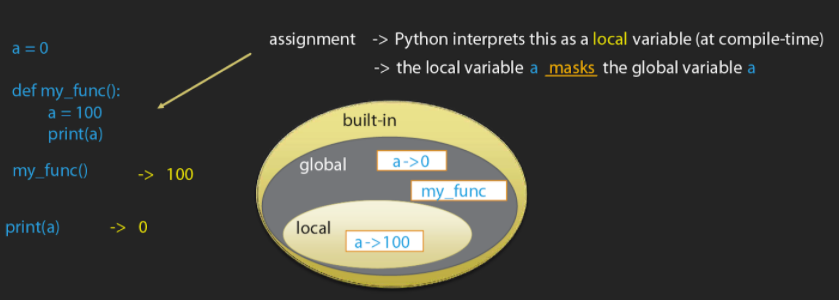

### The Global Keyword

We can tell python that a variable is meant to be scoped in the global scope by using the **global** keyword.

In [4]:
#Example - Error without global

def my_func():
    a = 100
    print(a)
my_func()
a += 100
print(a)

100


NameError: name 'a' is not defined

In [5]:
#Example - with global keyword

def my_func():
    global a
    a = 100
    print(a)
my_func()
a += 100
print(a)

100
200


In [6]:
#Another Example

counter = 0
def increment():
    global counter
    counter += 1
    
increment()
increment()
increment()

print(counter)

3


### Global and Local Scoping

When Python encounters a function definition at **compile-time**, it will **scan** for any labels(variables) that have values **assigned** to them (**anywhere in the function**).  
If the label has not been specified **global**, then it will be **local**.

The variables that are *referenced* but **NOT assigned** a value(assignmed operator isn't used) anywhere in the function(local), are marked/taken as **non-local**(*neither global nor local*) and Python will, at **run-time** look for them in enclosing scopes.

In [8]:
a = 10

def func1():
    print(a) #a is referenced only in entire function, not assinged
#at compile time -> a is tagegd 'non-local'

def func2():
    a = 100 #a is assigned in function
    print(a) 
#at compile time -> a is tagegd 'local'

def func3():
    global a #a is marked global using keyword 'global'
    print(a) 
#at compile time -> a is tagegd 'global'

def func4():
    print(a)
    a = 100 #a is assigned in function
#at compile time -> a is tagegd 'local'

In [9]:
func1()
func2()
func3()

10
100
10


In [11]:
a = 123
func4()

UnboundLocalError: local variable 'a' referenced before assignment

when we called **func4** results in a run-time error even a=123 is defned before.  
because **a** is local tagged, and we are referencing it before assignment.

### Coding

In [12]:
a = 10

In [13]:
def my_func(n):
    c = n ** 2
    return c 

In [14]:
def my_func(n):
    print('global a:', a) 
    c = a ** n
    return c

In [16]:
my_func(2)

global a: 10


100

In [17]:
c

NameError: name 'c' is not defined

###### As soon as function is called, the local variables are deleted from reference, and can't be called outside the function.

In [14]:
my_func(2)

global a: 10


100

In [15]:
a =10
def my_func(n):
    a = 20
    c = a ** n
    return c
my_func(2)

400

In [16]:
a

10

In [17]:
def my_func(n):
    global var
    var = 20
    c = var ** n
    return c

In [18]:
my_func(2)

400

In [19]:
var #available even after function 

20

In [20]:
def my_func(n):
    global vor
    vor = 20
    c = vor ** n
    return c

In [22]:
vor #my_func with vor not executed yet

NameError: name 'vor' is not defined

In [23]:
my_func(2)

400

In [24]:
vor

20

In [27]:
a = 10

def my_func():
    global a
    a = 'hello'
    print('global a:', a)
print(a)
my_func()
print(a)

10
global a: hello
hello


In [28]:
def my_func(n):
    global var
    c = var ** n
    return c
var = 2
var

2

In [29]:
my_func(2)

4

In [30]:
var = 10
my_func(2)

100

In [31]:
def my_func():
    print('global a:', a)
my_func()

global a: hello


In [32]:
def my_func():
    print('global a:', a)
    a = 'hello world'
    print(a)

In [33]:
my_func()

UnboundLocalError: local variable 'a' referenced before assignment

##### The variable 'a' is assigned local as discussed above, so throwing error.

In [34]:
a = 10
f = lambda n: print(a ** n)
f(2)

100


In [35]:
f = lambda n: print(b ** n)
f(2)

NameError: name 'b' is not defined

Again, b is search in local scope first, global than built-it  
It is not present in local scope, also not present in global or built-in scope.

So, throws error.

In [18]:
print(True) #print and true not defined anywhere, but available in built-in scope

True


In [19]:
def print(x):
    return 'hello {0}'.format(x)
#over written built-in print function

In [20]:
print('world')

'hello world'

In [21]:
print('world', '!')

TypeError: print() takes 1 positional argument but 2 were given

###### The print function is avialble in global scope, and it wont accept more than one argument (as defined in our print function).
###### So the print function present in built-in scope is not called, as built-in scope is checked last.

In [22]:
del print
print('world', '!') #deleted our print function, so now python can't find any print in global scope.
#so it will search in enclosing scope which is the built-in scope.

world !


In [ ]:
# Java or C++
for (int i = 0; i < 10; i++){
    int x = 2 * i
}
system.out.println(x) <<< This throws error

In [42]:
for i in range(10):
    x = 2 * i
print(x)

18


##### For loops and if conditions, they donNOT have their own scope in Python. The take scope of their 'enclosing' scope.

In [43]:
if (True):
    y = 100
print(y)

100


In [44]:
def my_func():
    if(True):
        yyyy = 100
    print(yyyy)
my_func()

100


In [45]:
x = 'MAIN'
def outer_func():
    x = 'hello'
    def inner_func():
        print(x) #takes x from out_func - non local scope(2nd preference, as x is not assigned anywhere in local scope)
    inner_func()

outer_func()

hello


In [48]:
x = 'MAIN'
def outer_func():
    x = 'hello'
    def inner_func():
        x = 'red'
        print(x) #local scope.(1st preference)
    inner_func()

outer_func()

red


In [49]:
z = 100
def outer_func():
    z = 200
    def inner_func():
        global z
        print(z) #global scope, since global keywork used
    inner_func()

outer_func()

100


In [50]:
z = 100
def outer_func():
    z = 200
    def inner_func():
        z #just referred, not assigned
        print(z) #z not assigned anywhere in local, so move to enclosing scope (non-local), where z is present.
    inner_func()

outer_func()

200


In [52]:
def outer_func():
    x = 'hello'
    def inner():
        x = 'tsai'
        print('inner x:', x)
    inner() #the x of inner() dies here.
    print('outer x:', x)
outer_func()

inner x: tsai
outer x: hello


In [53]:
del x #if defined outside, will delete all references
def outer():
    x = 'hello'
    def inner1():
        def inner2():
            nonlocal x #explicitly saying to use non local z.
            x = 'python'
        inner2()
    inner1()
    print(x)
outer()

python


##### Since it's nonlocal keyword, the x from outer is getting accessed inside inner2, and getting over written

In [25]:
def outer():
    x = 'hello'
    print('outer x:', x)
    def inner1():
        nonlocal x
        print('inner 1 x before assignment:', x)
        x = 'hello from inner1'
        print('inner 1 x after assignment:', x)
        def inner2():
            nonlocal x
            print('inner 2 x before assignment:', x)
            x = 'hello from inner2'
            print('inner 2 x after assignment:', x)
        inner2()
        print('checking x after calling inner2 but inside inner 1:', x)#value of x assigned inside inner2 stills stays.
    inner1()
    print('x after calling inner 1: ',x)
outer()

outer x: hello
inner 1 x before assignment: hello
inner 1 x after assignment: hello from inner1
inner 2 x before assignment: hello from inner1
inner 2 x after assignment: hello from inner2
checking x after calling inner2 but inside inner 1: hello from inner2
x after calling inner 1:  hello from inner2


In [56]:
x = 'global'

def outer():
    global x
    x = 'outer' #this x is global.
    def inner():
        nonlocal x 
        x = 'inner'
    inner()
    print(x)

SyntaxError: no binding for nonlocal 'x' found (<ipython-input-56-b4b15eca7658>, line 7)

##### Thrown error becuase no 'x' in nonlocal scope. There is just global 'x'.

In [57]:
del x
def outer():
    global x
    x = 'outer'
    def inner():
        global x 
        x = 'inner'
    inner()
    print(x)
outer()
print(x)

inner
inner


# Non Local Scopes

### Innrer functions
We can define functiones from inside anopther function

In [4]:
def outer_func():
    #some code
    
    def inner_func():
        #some code
        pass
    
    inner_func()
outer_func()

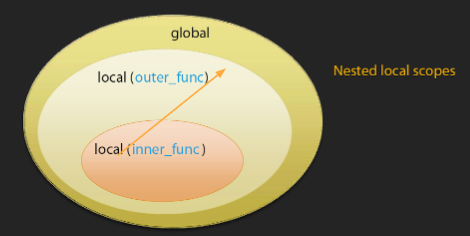

Both the functions have access to the global and built-in scope as well as their respective local scopes.  
But the **inner** function also has access to its **enclosing** scope - teh scope of the **outer** function.

That scope is neither local (to *inner_func*) nor global - it is called **nonlocal** scope.

## IMPORTANT

When the function is defined, at compile time, in the function defintition all the variables used are tagegd one of the three:
 * local - if there is an **assignment** happening anywhere inside the function for the variable.
 * global - the **global** keyword is used.
 * nonlocal - if **global** keyword is not used, and **no assignment** is found for that variable, it's marked **non local**.
 
#### At RUN-TIME.

* For the variables tagged local, it takes the value which is assigned inside local scope, if any variable which is assigned in local scope but is referred before assignment, it throws run time error.
* For the variables having global keywrod, it directly jumps to global scope, and search for that variable and takes the latest value assigned to that variable, or even if the value is assigned inside function it over writes the global variable value and is effected through the global scope.
* If variable is tagged nonlocal, the value from its enlosing scope is taken, if that variable is not assigned in it's immediate enclosing scope, it moves to next enclosing scope unless it find the variable value, **but if the value is not assigned in any enclosing scope it throws error**

*Note: if variable is marked explicitly useing **nonlocal** keyword, than the variable must be assigned a value, in the above enclosing scopes(excluding the Global scope) of the function - even if the variable is assigned in global, it throws error. *

### Nonlocal Variables

Whenever Python is told that a varialbe is **nonlocal** (using nonlocal keyword)  
it will look for it in the **enclosing local scope** chain until it **first** enounters the specified variable name.

#### Beware: It will only look in local scopes, it will NOT look in global scope

In [6]:
# Nonlocal and Global variables.

x = 100

print('The initial X: ',x)
def outer():
    x = 'python'
    
    def inner1():
        nonlocal x
        x = 'monty'
        
        def inner2():
            global x
            x = 'NOT 100'
            
        print('X inside Inner1 before calling Inner2: ', x)
        inner2()
        print('X inside Inner1 after calling inner2: ', x)
        
    inner1()
    print('X inside outer after calling Inner 1: ', x)
    
outer()
print('X after calling outer, now in global scope: ',x)

The initial X:  100
X inside Inner1 before calling any Inner2:  monty
X inside Inner1 after calling inner1:  monty
X inside outer after calling Inner 1:  monty
X after calling outer, now in global scope:  NOT 100


The initial X:  100  
The value of x is 100, since **no operation** is done on x.

X inside Inner1 before calling any Inner2:  monty  
The value of x='python' was **changed** to 'monty' inside inner1, as x was **given nonlocal** keyword.

X inside Inner1 after calling inner1:  monty
The value of x inside inner2, was change to 'NOT 100', but after calling inner2 and printing x, it **still gives 'monty'**, because the **x insdie inner2 was global**, so Python first check if there is **x which is local than nolocal than global**, so it found **nonlocal x which is 'monty'** and printed that.

X inside outer after calling Inner 1:  monty
The value inside outer was 'python' but since **nonlocal was used in inner1**, it got **overwritten to 'monty'**

X after calling outer, now in global scope:  NOT 100
Now after coming out of outer, back **in global scope**, the x=100 was **changed to x='NOT 100'** by using **global keyword** inside inner2.

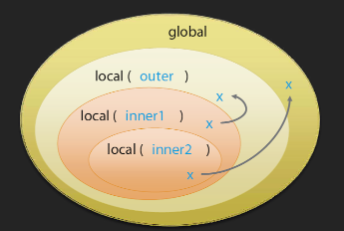

### The coding part of nonlocal, was covered before theory it self along with global scope coding.

# Closures

Suppose you need to count the number of time a user clicked a button on a webpage (tracking onClick)

**Approach 1**
```python
count = 0
def updateClickCount():
    count += 1
```
But, the pitfall is that any script on the page can change the counter variable, without calling **updateClickCount()**

**Approach 2:** Let's then declare the variable inside the function!
```python
def updateClickCount():count = 0
    count += 1
```
Oops! Everytime we call **updateClickCounter()** function. counter is set to 0, and then 1 😑😑

**Aproach 3:** Nested Functions!
```python
def countWrapper():
    count = 0
    def updateClickCount():
        count += 1
    updateClickCount()
    return count
```
This COULD have solved the problem. **ONLY** if we could reach **updateClickCount()** function from the outside without calling **countWrapper** everytime, or else it's just like previous approach setting counter=0 every time we call it. 😏

Here comes **CLOSURES** 😎😎

### Free Variables and Closures

Remember: Functions defined inside another function can access the outer(nonlocal) function.

In [17]:
def outer():
    
    #-------------------------------
    x = 'python'
    
    def inner():
        print(f'{x} rocks')
    #-------------------------------
        
    return inner

fn = outer()

**x** refers to the one in the outer function (nonlocal) scope and is called a **free variable**.

When we consider inner, we really are looking at:
* the function **inner**
* the free variable **x** (with current value 'python')

This is called **closure**. (The code with in ----- in above code is closure)

when we return **inner**, we are actually **returning** the the **closure**.

In [20]:
fn()

python rocks


When we called **fn**, at that time Python determined the value of **x** in the extended scope.

But notice, that **outer** had finished running **before** we called **fn** - it's scope was gone, but the value of **x** stayed, that is closure.

### Python Cells and Multi-Scoped Variables.

In [21]:
def outer():
    x='python'
    def inner():
        print(x)
    return inner

Here the value of **x** is *shared* between two scopes:
* outer
* closure

The label **x** is *in two different scopes* but always referes the same **value**

Python does this by creating a **cell** as an intermediary object.

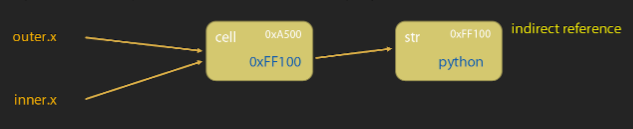

In effect, both variables **x** (in outer and inner) point to the **same cell**

When requesting the value of the variable, Python will "*double hop*" to get to the final value.

### Closures

You can think of the closure as a **function PLUS an extensed scope that contains the *free variables***

The free variable's value is the object the cell points to - so that could change over time!.

Every time the function in the closure is called and the free variable is references:  
&emsp;&emsp;Python looks up the **cell** object, and then whatever the cell is **pointing** to.

In [23]:
def outer():
    a = 100
    
    x = 'python'
    
    def inner():
        a = 10 #local variable
        print(f'{x} rocks')
              
    return inner
              
fn = outer()

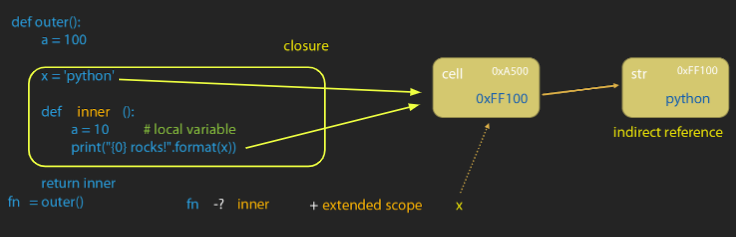

In [26]:
fn.__code__.co_freevars

('x',)

In [27]:
fn.__closure__

(<cell at 0x0000028F44187B88: str object at 0x0000028F42328C30>,)

In [31]:
def outer():
    x = 'python'
    print(hex(id(x)))
    def inner():
        print(hex(id(x)))
        print(f'{x} rocks')
    return inner

fn=outer()
fn()

0x28f42328c30
0x28f42328c30
python rocks


In [32]:
fn.__closure__

(<cell at 0x0000028F440A6918: str object at 0x0000028F42328C30>,)

In [38]:
#Modifying free variables.

#Implementing our updateClickCount using closure.

def counterWrapper():
    count = 0
    
    def updateClickCounter():
        nonlocal count
        count += 1
        return count
    
    return updateClickCounter

fn = counterWrapper()

In [40]:
fn()

1

In [41]:
fn()

2

In [42]:
fn()

3

### Multiple Istances of Closure

Every time we run a function, a **new** scope is created.  
If that fucntion generates a closure, a **new closure** is screated every time as well.


In [45]:
fn1 = counterWrapper()
fn2 = counterWrapper()

In [46]:
fn1()

1

In [47]:
fn1()
fn1()
fn1()

4

In [48]:
fn2()

1

**f1** and **f2** does NOT have the same extended scope.

They are different **instances** of the closure.

The **cells** are **different**

### Shared Extended Scopes

In [49]:
def outer():
    count = 0
    
    def inc1():
        nonlocal count
        count += 1
        return count
    
    def inc2():
        nonlocal count
        count += 1
        return count
    
    return inc1, inc2

f1,f2 = outer()

In [50]:
f1()

1

In [51]:
f2()

2

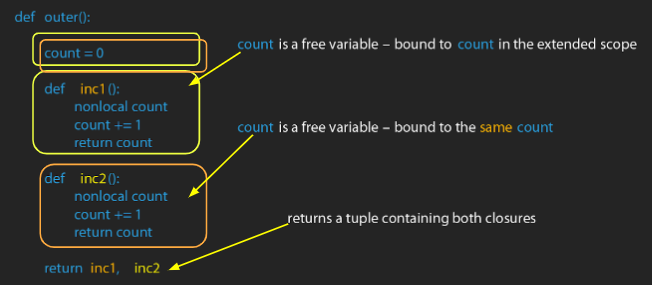

In [52]:
def adder(n):
    def inner(x):
        return x+n #n is nolocal variable here
    #so inner() + n is a closure.
    return inner

adder_1 = adder(1)
adder_2 = adder(2)
adder_3 = adder(3)

In [53]:
adder_1(102)

103

In [54]:
adder_2(102)

104

In [55]:
adder_3(102)

105

###### Three different scopes - no shared scopes.

In [59]:
# But suppose we tried doing it this way:

adders = []
for n in range(1,4):
    adders.append(lambda x:x+n)

In [60]:
adders[0](102)

105

In [61]:
adders[1](102)

105

In [62]:
adders[2](102)

105

###### Whatttttttttttttttttttttttttt........adder[0] should be lambda x: x+1, adder[1] should be lambda x:x+2.
###### Remeber, Python does not "evaluate" the free variables 'n' untill the adders[i] function is called.

Sicne all the three functions in **adders** are bound to the **same n**  
by the time we call **adders[0]**, the value of **n is 3**.(the laste iteration of loop set n to 3)

### Nested Closures

In [63]:
def incrementer(n):
    # inner + n is a closure
    def inner(start):
        current = start
        # inc + current + n is a closure.
        def inc():
            nonlocal current
            current += n
            return current
        return inc
    return inner

In [70]:
fn = incrementer(2) #increasing number by 2

In [71]:
fn.__code__.co_freevars

('n',)

In [72]:
inc_2 = fn(100) #starting from 100.

In [73]:
inc_2.__code__.co_freevars

('current', 'n')

In [74]:
inc_2()

102

In [75]:
inc_2()

104

### Coding:

In [76]:
def outer():
    x = 'python'
    def inner():
        print(x)
    return inner

In [77]:
fn = outer()

In [78]:
fn.__code__.co_freevars

('x',)

In [79]:
fn.__closure__

(<cell at 0x0000028F46B7C5E8: str object at 0x0000028F42328C30>,)

In [94]:
hex(id('python')) #same

'0x28f42328c30'

In [82]:
def outer():
    x = 123
    print(hex(id(x)))
    def inner():
        x = 123
        print(hex(id(x)))
    return inner

In [83]:
fn = outer()
fn()

0x7ff83367b0d0
0x7ff83367b0d0


In [84]:
def outer():
    x = 'tsai'
    print(hex(id(x)))
    def inner():
        y = x
        print(hex(id(y)))
    return inner
fn = outer()

0x28f4624daf0


In [85]:
fn()

0x28f4624daf0


In [86]:
fn.__closure__

(<cell at 0x0000028F46B9C528: str object at 0x0000028F4624DAF0>,)

In [87]:
def outer():
    count = 0
    def inner():
        nonlocal count
        count += 1
        return count
    return inner
fn = outer()
fn.__code__.co_freevars

('count',)

In [88]:
fn.__closure__

(<cell at 0x0000028F46B9CBB8: int object at 0x00007FF83367A170>,)

In [89]:
hex(id(0)) #same

'0x7ff83367a170'

In [90]:
fn()

1

In [91]:
fn.__closure__

(<cell at 0x0000028F46B9CBB8: int object at 0x00007FF83367A190>,)

In [92]:
hex(id(1))

'0x7ff83367a190'

In [93]:
fn(), fn.__closure__, hex(id(2))

(2,
 (<cell at 0x0000028F46B9CBB8: int object at 0x00007FF83367A1B0>,),
 '0x7ff83367a1b0')

In [101]:
#shared extended scope
def outer():
    count = 0
    def inc1():
        nonlocal count
        count += 1
        return count

    def inc2():
        nonlocal count
        count += 1
        return count
    return inc1, inc2
fn1, fn2 = outer()

In [102]:
fn1.__code__.co_freevars, fn2.__code__.co_freevars

(('count',), ('count',))

In [103]:
fn1.__closure__, fn2.__closure__

((<cell at 0x0000028F46B9C558: int object at 0x00007FF83367A170>,),
 (<cell at 0x0000028F46B9C558: int object at 0x00007FF83367A170>,))

In [104]:
fn1()

1

In [105]:
fn1.__closure__, fn2.__closure__

((<cell at 0x0000028F46B9C558: int object at 0x00007FF83367A190>,),
 (<cell at 0x0000028F46B9C558: int object at 0x00007FF83367A190>,))

In [106]:
fn2()

2

In [107]:
def pow(n):
    def inner(x):
        return x ** n
    return inner

In [108]:
square = pow(2)

In [109]:
square.__closure__

(<cell at 0x0000028F465AA258: int object at 0x00007FF83367A1B0>,)

In [110]:
hex(id(2))

'0x7ff83367a1b0'

In [111]:
square(9)

81

In [112]:
square

<function __main__.pow.<locals>.inner(x)>

In [113]:
cube = pow(3)

In [114]:
cube.__closure__

(<cell at 0x0000028F46B9C768: int object at 0x00007FF83367A1D0>,)

In [115]:
cube(5)

125

In [116]:
def adder(n):
    def inner(x):
        return x + n
    return inner

In [117]:
add_1 = adder(1)
add_2 = adder(2)
add_3 = adder(3)

In [118]:
add_1.__closure__, add_2.__closure__, add_3.__closure__

((<cell at 0x0000028F46B9C4F8: int object at 0x00007FF83367A190>,),
 (<cell at 0x0000028F46B9C918: int object at 0x00007FF83367A1B0>,),
 (<cell at 0x0000028F46B9C408: int object at 0x00007FF83367A1D0>,))

In [119]:
add_1(10)

11

In [120]:
add_2(10)

12

In [121]:
add_3(10)

13

In [122]:
adders = []

for n in range(1, 4):
    adders.append(lambda x: x + n) #The lambda doesn't getss executed until called

In [123]:
adders

[<function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>]

In [124]:
n

3

In [125]:
adders[0](10)

13

In [126]:
def create_adders():
    adders = []
    for n in range(1, 4):
        adders.append(lambda x: x + n)
    return adders

In [127]:
adders = create_adders()

In [128]:
adders

[<function __main__.create_adders.<locals>.<lambda>(x)>,
 <function __main__.create_adders.<locals>.<lambda>(x)>,
 <function __main__.create_adders.<locals>.<lambda>(x)>]

In [129]:
adders[0].__closure__

(<cell at 0x0000028F46B9C7F8: int object at 0x00007FF83367A1D0>,)

In [130]:
adders[1].__closure__

(<cell at 0x0000028F46B9C7F8: int object at 0x00007FF83367A1D0>,)

##### The Problem still exists.

In [131]:
def create_adders():
    adders = []
    for n in range(1, 4):
        adders.append(lambda x, y=n: x + y) #now y takes value of n individually.
    return adders

In [132]:
adders = create_adders()

In [133]:
adders[0](10), adders[1](10), adders[2](10)

(11, 12, 13)

In [136]:
# Problem Statement: Maintaining weights/spending of 4 people

class Averager:
    def __init__(self):
        self.numbers = []

    def add(self, number):
        self.numbers.append(number)
        total = sum(self.numbers)
        count = len(self.numbers)
        return total/count

In [137]:
a = Averager()

In [138]:
a.add(10)

10.0

In [139]:
a.add(20)
a.add(45)

25.0

In [140]:
#Using closure

def averager():
    numbers = []
    def add(number):
        numbers.append(number)
        total = sum(numbers)
        count = len(numbers)
        return total/count
    return add

In [141]:
a = averager()
a(10)
a(20)
a(45)

25.0

In [142]:
b = averager()
b(10)
b(30)

20.0

In [143]:
a(125)

50.0

In [144]:
a.__closure__, b.__closure__

((<cell at 0x0000028F46B9C648: list object at 0x0000028F4629DAC8>,),
 (<cell at 0x0000028F46B95678: list object at 0x0000028F4625CDC8>,))

In [145]:
#Closures withoout list, to reduce overhead

def averager():
    total = 0
    count = 0
    def add(number):
        nonlocal total
        nonlocal count
        total = total + number
        count = count + 1
        return total/count
    return add

In [146]:
a = averager()
a(10)

10.0

In [147]:
a(20)
a(45)

25.0

In [148]:
from time import perf_counter

In [149]:
perf_counter() #time in seconds.

63888.8611544

In [150]:
perf_counter()

63900.4266092

In [151]:
class Timer:
    def __init__(self):
        self.start = perf_counter()

    def poll(self):
        return perf_counter() - self.start

In [152]:
t1 = Timer()
t1.poll()

3.440000000409782e-05

In [153]:
t1.poll()

17.371523400004662

In [154]:
class Timer:
    def __init__(self):
        self.start = perf_counter()

    def __call__(self):
        return perf_counter() - self.start

In [155]:
t1 = Timer()

In [156]:
t1()

11.641550899999856

In [157]:
# let's use a closure now

def timer():
    start = perf_counter()
    def poll():
        return perf_counter() - start
    return poll

In [158]:
t2 = timer()
t2()

3.139999898849055e-05

In [160]:
t2()

19.14364210000349

In [161]:
def counter(initial_value = 0):
    def inc(increment = 1):
        nonlocal initial_value
        initial_value += increment
        return initial_value
    return inc

In [162]:
counter1 = counter()

In [163]:
counter1()

1

In [164]:
counter1()

2

In [165]:
counter1()
counter1()
counter1()

5

In [166]:
counter1(5)

10

In [167]:
def counter(fn):
    cnt = 0
    def inner(*args, **kwargs):
        nonlocal cnt
        cnt += 1
        print('{0} has been called {1} times'.format(fn.__name__, cnt))
        return fn(*args, **kwargs)
    return inner

In [168]:
def add(a, b):
    return a + b
def mul(a, b):
    return a*b

In [169]:
counter_add = counter(add)

In [170]:
counter_add.__closure__

(<cell at 0x0000028F46B95AF8: int object at 0x00007FF83367A170>,
 <cell at 0x0000028F46B779D8: function object at 0x0000028F4612C5E8>)

In [171]:
counter_add(1, 2)

add has been called 1 times


3

In [172]:
counter_add(10, 20)

add has been called 2 times


30

In [173]:
counter_mult = counter(mul)
counter_mult(2, 5)
counter_mult(2, 5)
counter_mult(2, 5)
counter_mult(2, 5)
counter_mult(2, 5)

mul has been called 1 times
mul has been called 2 times
mul has been called 3 times
mul has been called 4 times
mul has been called 5 times


10